In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
data_train="/content/drive/MyDrive/project/train"
data_valid="/content/drive/MyDrive/project/valid"

In [ ]:
img_width= 180
img_height=180

In [ ]:
data_trains = tf.keras.utils.image_dataset_from_directory(
    data_train,
    shuffle=True,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False)

Found 14997 files belonging to 8 classes.


In [ ]:
data_trains.class_names

['Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___healthy']

In [ ]:
# Assuming data_trains is an object with class_names attribute
for index, class_name in enumerate(data_trains.class_names):
    print(f"Index: {index}, Class: {class_name}")

Index: 0, Class: Potato___Early_blight
Index: 1, Class: Potato___Late_blight
Index: 2, Class: Potato___healthy
Index: 3, Class: Strawberry___Leaf_scorch
Index: 4, Class: Strawberry___healthy
Index: 5, Class: Tomato___Early_blight
Index: 6, Class: Tomato___Late_blight
Index: 7, Class: Tomato___healthy


In [ ]:
data_plant=data_trains.class_names

In [ ]:
data_valids = tf.keras.utils.image_dataset_from_directory(
    data_valid,
    shuffle=True,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False)

Found 3750 files belonging to 8 classes.


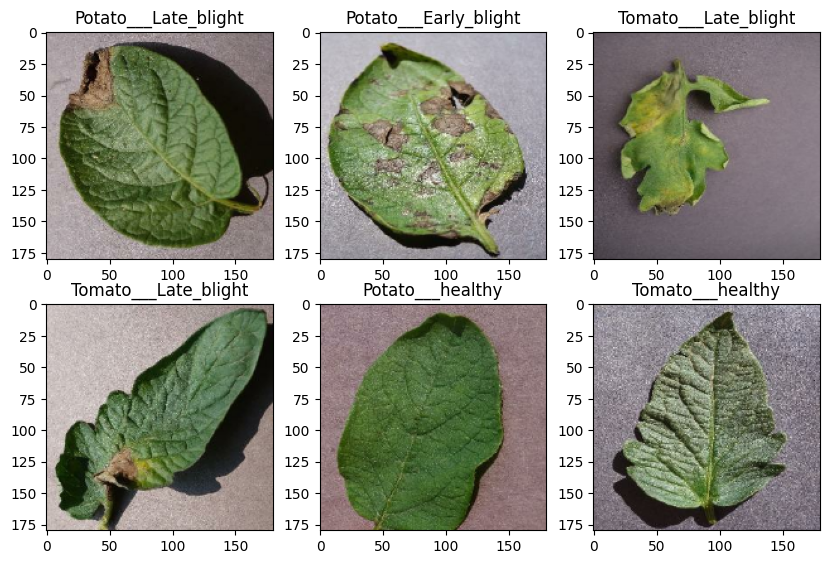

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 10))

for images, labels in data_trains.take(1):  # Assuming data_trains is your dataset
    for i in range(6):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))  # Fixing the imshow line
        plt.title(data_plant[labels[i]])

plt.show()

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
data_trains

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),  # Added activation function
    layers.Dense(units=len(data_plant), activation='softmax')  # Added activation function
])

In [ ]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [ ]:
epochs_size = 35
batch_size = 32  # You can adjust this value based on your preference

history = model.fit(data_trains, validation_data=data_valids, epochs=epochs_size, batch_size=batch_size)


Epoch 1/35


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


469/469 [==============================] - 2687s 6s/step - loss: 0.7159 - accuracy: 0.7451 - val_loss: 0.2558 - val_accuracy: 0.9195
Epoch 2/35
469/469 [==============================] - 570s 1s/step - loss: 0.2211 - accuracy: 0.9203 - val_loss: 0.1973 - val_accuracy: 0.9331
Epoch 3/35
469/469 [==============================] - 571s 1s/step - loss: 0.1622 - accuracy: 0.9435 - val_loss: 0.2707 - val_accuracy: 0.9091
Epoch 4/35
469/469 [==============================] - 571s 1s/step - loss: 0.1154 - accuracy: 0.9600 - val_loss: 0.1295 - val_accuracy: 0.9587
Epoch 5/35
469/469 [==============================] - 525s 1s/step - loss: 0.0781 - accuracy: 0.9727 - val_loss: 0.1610 - val_accuracy: 0.9469
Epoch 6/35
469/469 [==============================] - 533s 1s/step - loss: 0.0597 - accuracy: 0.9790 - val_loss: 0.3089 - val_accuracy: 0.9067
Epoch 7/35
469/469 [==============================] - 570s 1s/step - loss: 0.0666 - accuracy: 0.9761 - val_loss: 0.2827 - val_accuracy: 0.9227
Epoch 8/3

Text(0.5, 1.0, 'Accuracy')

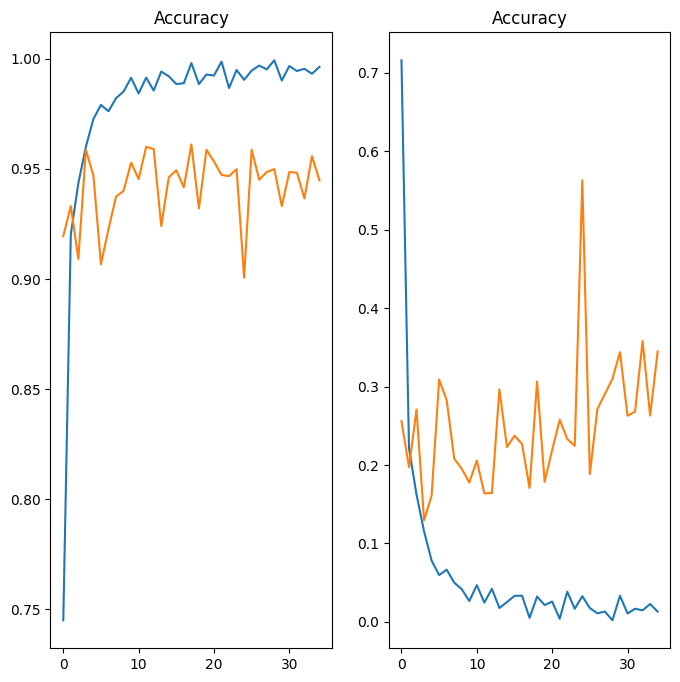

In [ ]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1);
plt.plot(epochs_range,history.history['accuracy'],label='Training Accuracy')
plt.plot(epochs_range,history.history['val_accuracy'],label='Validation Accuracy')
plt.title('Accuracy')
plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label='Training Loss')
plt.plot(epochs_range,history.history['val_loss'],label='Validation Loss')
plt.title('Accuracy')


In [ ]:
image='/content/drive/MyDrive/project/test/PotatoHealthy1.JPG'
image = tf.keras.utils.load_img(image,target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [ ]:
predict = model.predict(img_bat)

1/1 [==============================] - 0s 266ms/step


In [ ]:
score=tf.nn.softmax(predict)

In [ ]:
print('Plant diseases is {} with accuracy of {:0.2f}'.format(data_plant[np.argmax(score)],np.max(score)*100))

Plant diseases is Potato___healthy with accuracy of 27.97


In [ ]:
model.save('/content/drive/MyDrive/image_classificationdiseasesfinal.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
